# **@62**
# **Version 1.0**

In [ ]:
'''
Google Drive
'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


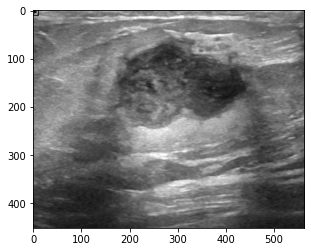

The output is:
tensor([[-0.7486, -0.4122]], device='cuda:0', grad_fn=<AddmmBackward0>)
breast cancer


In [ ]:
import torch

import torchvision

import matplotlib.pyplot as plt

from PIL import Image

from torch import nn

from torchvision import models

from torchvision import transforms 

device = torch.device('cuda' if torch.cuda.is_available() else'cpu')


class Net(nn.Module):

    def __init__(self,model):

        super(Net,self).__init__()

        self.resnet = nn.Sequential(*list(model.children())[:-1])

     #Optional to freeze the convolutional layers

        # for p in self.parameters():

        #     p.requires_grad = False

        self.fc = nn.Linear(in_features=2048,out_features=2)

 

 

    def forward(self,x):

        x = self.resnet(x)

        x = x.view(x.shape[0], -1)

        x = self.fc(x)

        return x

 

resnet152 = models.resnet152(pretrained=False)

net = Net(resnet152)

model = torch.load(r'/content/drive/MyDrive/Datasets/61/model2021_6_23.pkl')

img = Image.open(r'/content/drive/MyDrive/Datasets/61/test/205.png')

plt.subplot(1,1,1)

plt.imshow(img) 

plt.show() 

T1 = transforms.Resize(256) #Random crop

img = T1(img)

T2 =transforms.CenterCrop(224)

img = T2(img)

T3 = transforms.ToTensor()

img = T3(img)

T4 = transforms.Normalize([0.485, 0.456, 0.406],

                          [0.229, 0.224, 0.225])
img = T4(img)

img = img.unsqueeze(0)

model.eval()

img = img.to(device)

outputs = model(img)

# print(outputs)

_, preds = torch.max(outputs, 1)

result = torch.max(outputs)

print('The output is:')

print(outputs)

preds = preds.cpu().numpy()

preds = preds[0]

if(preds==0):

    print('non breast cancer')
    
else:
    
    print('breast cancer')
    

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
from torchvision import models
from torchvision import transforms 



def deviceselect():
    global device
    device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
    

class Net(nn.Module):
    


    def __init__(self,model):

        super(Net,self).__init__()

        self.resnet = nn.Sequential(*list(model.children())[:-1])

        #Option to freeze convolutional layers

        # for p in self.parameters():

        #     p.requires_grad = False

        self.fc = nn.Linear(in_features=2048,out_features=2)

    def forward(self,x):

        x = self.resnet(x)

        x = x.view(x.shape[0], -1)

        x = self.fc(x)

        return x


def loadmodel():
    
    global model
    
    resnet152 = models.resnet152(pretrained=False)

    net = Net(resnet152)

    model = torch.load(r'/content/drive/MyDrive/Datasets/61/model2021_6_23.pkl')
    
def prediction(fd):
    
    img = Image.open(fd)

    plt.subplot(1,1,1)

    plt.imshow(img) 

    plt.show() 

    T1 = transforms.Resize(256) # Random crop

    img = T1(img)

    T2 =transforms.CenterCrop(224)

    img = T2(img)

    T3 = transforms.ToTensor()

    img = T3(img)

    T4 = transforms.Normalize([0.485, 0.456, 0.406],

                          [0.229, 0.224, 0.225])
    img = T4(img)

    img = img.unsqueeze(0)
    
    model.eval()

    img = img.to(device)

    outputs = model(img)

    _, preds = torch.max(outputs, 1)
    
    result = torch.max(outputs)

    print('The output is:')

    print(outputs)

    preds = preds.cpu().numpy()

    preds = preds[0]

    if(preds==0):

        print('non breast cancer')
    
    else:
    
        print('breast cancer')

deviceselect()
loadmodel()
fd = input("Please Enter：")
prediction(fd)
